# 10
Hellin and Jungers (1957) present the data in the table on the reaction of sulphuric acid with diethylsulphate in aqueous solution at 22,9°C:

$$ H_2SO_4 + (C_2H_5)_2SO_4 \to 2C_2H_5SO_4H$$

<img src="Tut 10.png" width="500px">

Initial concentrations of $H_2SO_4$ and $(C_2H_5)_2SO_4$ are each 5,5 mol/ℓ.  Find a rate equation for this reaction. [$k_1 = 6.7 \times 10^{-4}$ l/mol.min, Kc = 5]

In [33]:
# aquaeous solution so no need for u.g.l.
# Since starting concentrations are 5.5mol per reactant, product should be 11
    #at completion, but it's 5.8 at infinity, therefore reversible reaction
# rA = -k1*CA*CB + 0.5*k2*CC**2
# k2 = k1/kc
# rB = rA
# rC = -2*rA

In [1]:
from numpy import log, array, exp, linspace
from scipy.integrate import odeint
from scipy.stats import linregress 
import matplotlib.pyplot as plt
%matplotlib inline

$$A + B \to 2C$$

In [5]:
T = 22.9 + 273.15 # Kelvin
CAo = 5.5 #mol/L
CBo = 5.5 #mol/L
CCo = 0

In [10]:
CCe = 5.8 #mol/L read from table
deltaCCe = CCe - 0
CAe = CAo - 0.5*deltaCCe
CBe = CBo - 0.5*deltaCCe
kc= (CCe**2)/(CAe*CBe)
kc

4.976331360946745

In [38]:
data = array([[0,0],
              [41,1.18],
              [48,1.38],
              [55,1.63],
              [75,2.24],
              [96,2.75],
              [127,3.31],
              [146,3.76],
              [162,3.81],
              [180,4.11],
              [194,4.31],
              [212,4.45],
              [267,4.86],
              [318,5.15],
              [368,5.32],
              [379,5.35],
              [410,5.42],
              [500,5.80]])
texp = data[:,0]
CCexp = data[:,1]

In [34]:
def func (C,t):
    CA,CB,CC = C
    rA = -k1*CA*CB + (k1/kc)*CC**2
    rB = rA
    rC = -2*rA
    dCAdt = rA
    dCBdt = rB
    dCCdt = rC
    return [dCAdt,dCBdt,dCCdt]

0.00013463733650416173

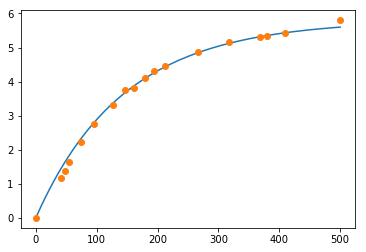

In [39]:
tspan = linspace(0,500,1000)

k1 = 0.00067 #guess

vals = odeint(func,[CAo, CBo, CCo],tspan)

CC = vals[:,2]

plt.plot(tspan,CC,'-',texp,CCexp,'o')
k2 = k1/kc
k2